In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import dataset
attrition_pop = pd.read_feather('attrition.feather')

## Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

attrition_pop and mean_attrition_pop (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as pd.

#### Instructions 
+ Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022.
+ Calculate the mean employee Attrition in the sample.
+ Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.
+ Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of attrition_pop.

In [2]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Define the population mean
pop_mean = attrition_pop['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = (abs(pop_mean - mean_attrition_srs50) / pop_mean) * 100

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658228


In [3]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].astype(float).mean()

# Define pop_mean
pop_mean = attrition_pop['Attrition'].astype(float).mean()

# Calculate the relative error percentage
rel_error_pct100 = (abs(pop_mean - mean_attrition_srs100) / pop_mean) * 100

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455694


````
Samply the best! As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.
````

## Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

attrition_pop is available; pandas and matplotlib.pyplot are loaded with their usual aliases.

#### Instructions 
+ Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.
+ Draw a histogram of the mean_attritions list with 16 bins.

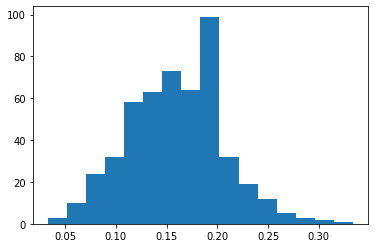

In [4]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()

## Exact sampling distribution
To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases. The expand_grid() function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the [pandas documentation.](https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data)

#### Instructions
+ Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.
+ Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.
+ Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll in increasing order from 1.0 to 8.0.

In [6]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

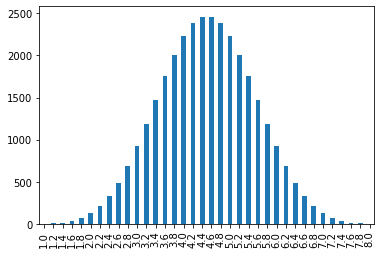

In [7]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')


# creating a bar plot for mean_roll column
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

## Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

#### Instructions 1/3
+ Sample one to eight, five times, with replacement. Assign to five_rolls.
+ Calculate the mean of five_rolls.
+ Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
+ Plot sample_means_1000 as a histogram with 20 bins.

In [8]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

3.4


In [9]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    # randomly select 5 numbers between 1 and 9
    sample_means_1000.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[5.4, 4.6, 4.2, 4.6, 6.0, 4.8, 5.4, 3.2, 4.6, 3.2]


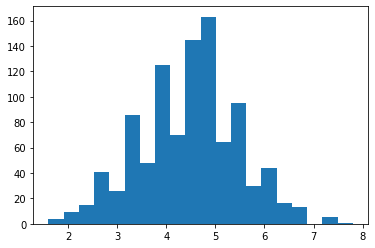

In [10]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

## Population & sampling distribution means
One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

#### Instructions
+ Calculate the mean of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a mean of sample means).
#### Question
How does sample size affect the mean of the sample means?
#### Answer
+ Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.

In [ ]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

## Population & sampling distribution variation
You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy is loaded with its usual alias.

#### Instructions 
+ Calculate the standard deviation of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a standard deviation of sample means).

#### Question
How are the standard deviations of the sampling distributions related to the population standard deviation and the sample size?

#### Answer
+ The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.

In [ ]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5 ,ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50 ,ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500 ,ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)